Mounting google drive, so that we can access the file inside drive.This requires authentication. So if the instructor wants to run it, he/she can upload to sesssion storage and change the path in read_csv and run it.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing haberman data set from my google drive.

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/haberman.csv")

In [5]:
data['status'] = data['status'].map({1:"yes", 2:"no"}).astype('category')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     306 non-null    int64   
 1   year    306 non-null    int64   
 2   nodes   306 non-null    int64   
 3   status  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [7]:
print('data_points',data.shape[0])
print('classes',data['status'].unique())
print('features',data.columns[data.columns != 'status'])
print('data points in each class\n',data['status'].value_counts())
print('data points in each class\n',data['status'].value_counts(normalize=True))

data_points 306
classes ['yes', 'no']
Categories (2, object): ['yes', 'no']
features Index(['age', 'year', 'nodes'], dtype='object')
data points in each class
 yes    225
no      81
Name: status, dtype: int64
data points in each class
 yes    0.735294
no     0.264706
Name: status, dtype: float64


Data Points - 305

Class - 2 classes, 1 and 2. The status column is the targe column and has two unique values.

Features - 3 (Features are all the columns in the dataframe excluding status column)

The age of the patients vary from 30 to 83 with the median of 52.

The data is imbalanced, Class 1 is 73.28 and Class 2 is 26.71%

The objective of the Assignment is to Analyse the hamber data to classify them between 1 and 0,in the survival status, that is the number of people survived and non survived. Using this we can predict it for any future data point.We're trying to analyse the factors on which the patients survival stauts depends.

Univariate Analysis

PDF

[Text(0.5, 1.0, 'PDF Plot Age')]

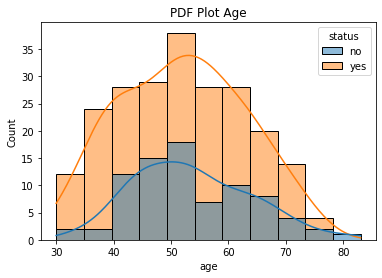

In [13]:
sns.histplot(data=data, x="age", kde=True, hue="status").set(title='PDF Plot Age')

[Text(0.5, 1.0, 'PDF Plot Nodes')]

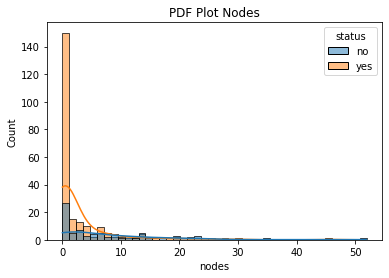

In [15]:
sns.histplot(data=data, x="nodes", kde=True, hue="status").set(title='PDF Plot Nodes')

[Text(0.5, 1.0, 'PDF Plot Year')]

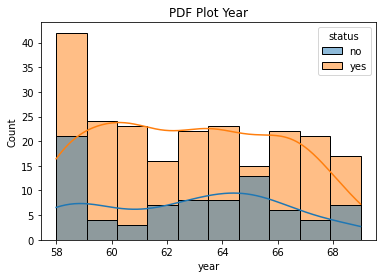

In [14]:
sns.histplot(data=data, x="year", kde=True, hue="status").set(title='PDF Plot Year')

Unike the iris, the independant variables doesn't really classify the target column much.

Age => Woman above the age of 75 have very less chance of survival.

Nodes => From the graph node seems to have a lot of outliers. There seems to be more data with just 1 data point.

Year => 65-66 year has recorded the lowest survival chance.



CDF

In [18]:
data_1 = data[data['status'] == 'yes']
data_2 = data[data['status'] == 'no']

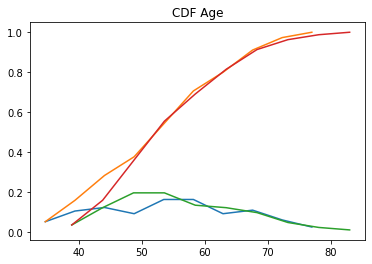

In [19]:
counts, bins = np.histogram(data_1['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:], cdf)


counts, bins = np.histogram(data_2['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:], cdf)
plt.title('CDF Age')

plt.show();

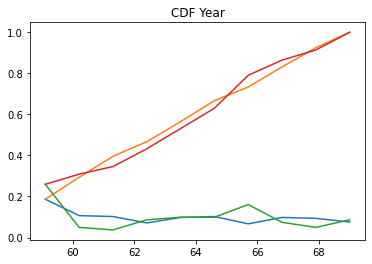

In [20]:
counts, bins = np.histogram(data_1['year'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:], cdf)


counts, bins = np.histogram(data_2['year'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:], cdf)
plt.title('CDF Year')


plt.show();

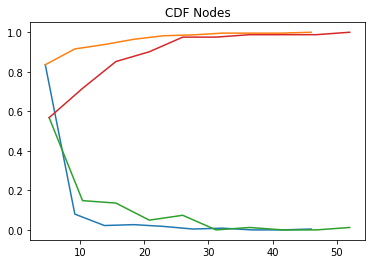

In [21]:
counts, bins = np.histogram(data_1['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:], cdf)


counts, bins = np.histogram(data_2['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:], cdf)
plt.title('CDF Nodes')


plt.show();

As I stated before we're not able to observe any considerable variation in age,node,year, between 1 and 2, to classify it.
The CDF of the status 1 and 2 seems to be a lot similar.
The CDF also seems to end in the same point in x and y axis for stauts 1 and 2. This is not much helpful for classification af status 1 and 2.

Box Plot

[Text(0.5, 1.0, 'Age')]

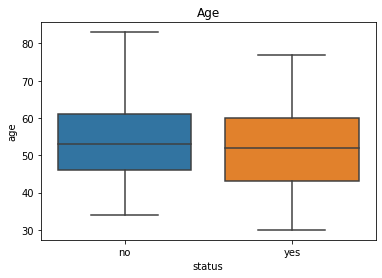

In [22]:
sns.boxplot(x='status',y='age', data=data).set(title='Age')

[Text(0.5, 1.0, 'Year')]

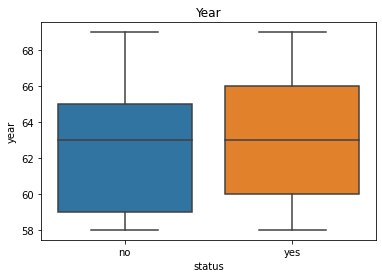

In [23]:
sns.boxplot(x='status',y='year', data=data).set(title='Year')

[Text(0.5, 1.0, 'Nodes')]

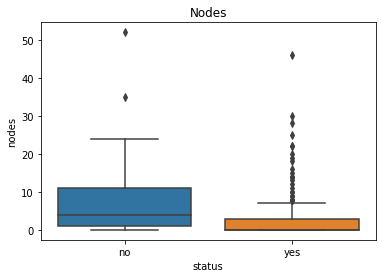

In [24]:
sns.boxplot(x='status',y='nodes', data=data).set(title='Nodes')

We can observe one thing from the boxplots. The nodes of status 1 is mostly lesser than 10. There are few outliers. But we consider the majority of data.

Violin Plots

[Text(0.5, 1.0, 'Age')]

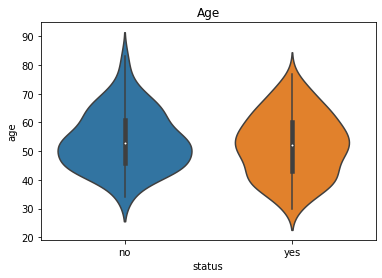

In [25]:
sns.violinplot(x="status", y="age", data=data, size=8).set(title='Age')

[Text(0.5, 1.0, 'Year')]

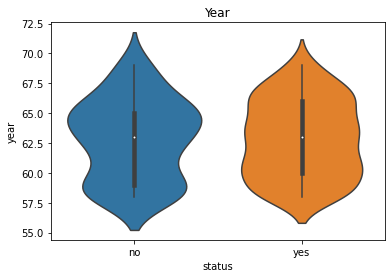

In [26]:
sns.violinplot(x="status", y="year", data=data, size=8).set(title='Year')

[Text(0.5, 1.0, 'Nodes')]

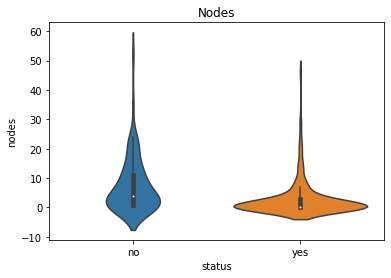

In [27]:
sns.violinplot(x="status", y="nodes", data=data, size=8).set(title='Nodes')

As you can see, even here the nodes column only has different plot, the age and year are mostly identical.

Bivariate Analysis.

Pair Plot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


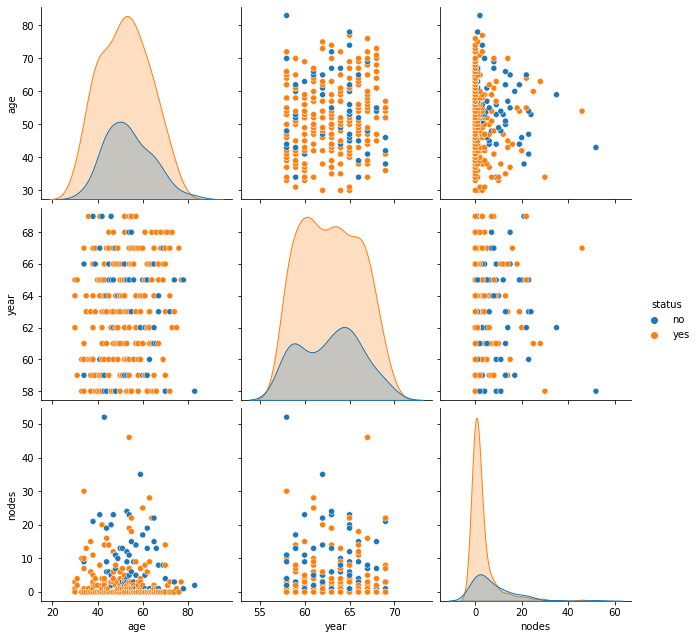

In [28]:
sns.pairplot(data, hue="status", size=3);
plt.show()

Scatter Plot

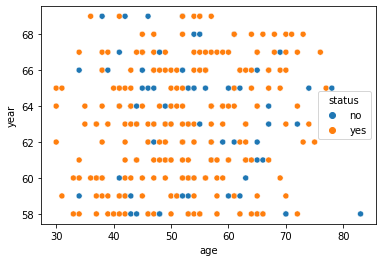

In [29]:
sns.scatterplot(data=data, x="age", y="year", hue="status")

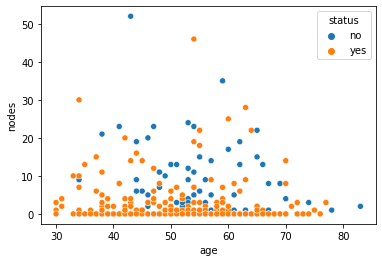

In [30]:
sns.scatterplot(data=data, x="age", y="nodes", hue="status")

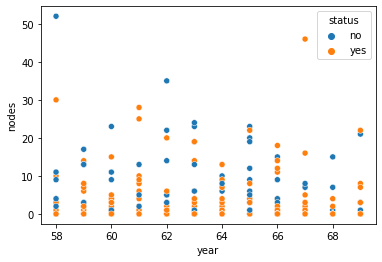

In [31]:
sns.scatterplot(data=data, x="year", y="nodes", hue="status")

 Summarizing plots in english



*   The year and nodes seem to be useful when used together.
*   Almost 80 % of patients have less than or equal to 5 nodes.

*   Most of the Value of nodes lie between 0-5. 
*   Patients treated after 1959 have better survival rate, except for year 1965. 



*   Nodes data seem to have many outliers, as observed from box plot.



